[20220918]

# 3. Eval Visual

prepare data for LSTM

## Goal
To check a summary of the data.

## Plan
Checklist what will be done on the notebook :

        [ ] get the data
        [ ] generate input ready dataset

In [2]:
# !pip install flake8 pycodestyle_magic

In [3]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
sys.path.insert(1,'../../src/')

# ## import myfunc inside src folder
# import ramal
# import joblib

In [4]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

full_path = globals()['_dh'][0]
folder_name = full_path.split('\\')[-1]

PATH_RAW = config['path']['raw_wm']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
PATH_MODEL = config['path']['artifact']+folder_name+'/'
PATH_UDF = config['path']['udf']

In [5]:
from keras.models import load_model
import tensorflow as tf

In [6]:
# %load_ext pycodestyle_magic

## Get Data

In [7]:
# %%flake8
df_all = pd.read_csv(PATH_INTERIM+'data_focus_iter3.csv')
df_all['is_holiday'] = df_all.IsHoliday.astype(int)
df_all.sample(8)

,ids,Date,sales,Store,Temperature,IsHoliday,Fuel_Price,sales_ss,is_holiday
431481,5:82,2011-01-21,2938.16,5,45.41,False,3.016,-0.644335,0
273573,32:97,2010-05-14,16062.58,32,46.42,False,2.788,-0.916470,0
60597,15:45,2012-03-02,0.00,15,33.24,False,3.983,-0.269133,0
127468,20:49,2011-02-25,26629.56,20,33.20,False,3.274,1.753567,0
396703,44:5,2010-07-02,719.34,44,78.82,False,2.814,-0.447233,0
2344,10:25,2011-03-04,22490.62,10,56.96,False,3.674,0.369687,0
423689,5:14,2012-06-15,3716.87,5,81.64,False,3.393,-0.002719,0
394989,44:3,2010-07-16,370.07,44,77.79,False,2.791,-0.723302,0


In [8]:
# %%flake8
def ts_lookback_features(df, window_back, target_cols=None, oot_data=None, df_return=False,
                         time_col='Date', feature_cols=['sales_ss']):

    if target_cols is None:
        target_cols = feature_cols

    # print(target_cols)
    df = df.sort_values(time_col).reset_index(drop=True)
    df['Xprev'] = df.apply(lambda x: df[feature_cols][
                    max(-1, x.name-(window_back)):int(x.name)].values, axis=1)
    df_temp = df[window_back:]
    df_temp['Xprev'] = df_temp['Xprev'].apply(lambda x: x.reshape(1,
                                              window_back, len(feature_cols)))

    X_temp = np.vstack(df_temp['Xprev'].values)
    y_temp = df_temp[target_cols].values.reshape((len(df_temp),
                                                  len(target_cols)))
    if oot_data is None:
        X_tr = X_temp[:]
        y_tr = y_temp[:]
        X_oot = []
        y_oot = []
    else:
        X_tr = X_temp[:-oot_data]
        y_tr = y_temp[:-oot_data]
        X_oot = X_temp[-oot_data:]
        y_oot = y_temp[-oot_data:]

    if df_return:
        return df_temp, X_tr, y_tr, X_oot, y_oot
    else:
        return X_tr, y_tr, X_oot, y_oot

In [9]:
%matplotlib inline

## Get Model

In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model1 = load_model(PATH_MODEL + 'ws_data_model1_iter3.h5',compile=False)
model1.compile(loss='mean_squared_error', optimizer=opt, metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='the_rmse'),
        tf.keras.metrics.MeanAbsolutePercentageError(name='the_mape'),
    ])

In [11]:
model2 = load_model(PATH_MODEL + 'ws_data_model2_iter3.h5',compile=False)
model2.compile(loss='mean_squared_error', optimizer=opt, metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='the_rmse'),
        tf.keras.metrics.MeanAbsolutePercentageError(name='the_mape'),
    ])

In [12]:
model3 = load_model(PATH_MODEL + 'ws_data_model3_iter3.h5',compile=False)
model3.compile(loss='mean_squared_error', optimizer=opt, metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='the_rmse'),
        tf.keras.metrics.MeanAbsolutePercentageError(name='the_mape'),
    ])

In [13]:
model4 = load_model(PATH_MODEL + 'ws_data_model4_iter3.h5',compile=False)
model4.compile(loss='mean_squared_error', optimizer=opt, metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='the_rmse'),
        tf.keras.metrics.MeanAbsolutePercentageError(name='the_mape'),
    ])

In [14]:
model5 = load_model(PATH_MODEL + 'ws_data_model5_iter3.h5',compile=False)
model5.compile(loss='mean_squared_error', optimizer=opt, metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='the_rmse'),
        tf.keras.metrics.MeanAbsolutePercentageError(name='the_mape'),
    ])

In [15]:
model6 = load_model(PATH_MODEL + 'ws_data_model6_iter3.h5',compile=False)
model6.compile(loss='mean_squared_error', optimizer=opt, metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='the_rmse'),
        tf.keras.metrics.MeanAbsolutePercentageError(name='the_mape'),
    ])

In [16]:
model7 = load_model(PATH_MODEL + 'ws_data_model7_iter3.h5',compile=False)
model7.compile(loss='mean_squared_error', optimizer=opt, metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='the_rmse'),
        tf.keras.metrics.MeanAbsolutePercentageError(name='the_mape'),
    ])

## Get Predict and Visual

In [40]:
df_all.sample(5)['ids']

37208     13:38
139070    21:52
16163     11:45
14312     11:31
150233    22:55
Name: ids, dtype: object

In [49]:
# p_id = '19:42'
# p_id = '31:99'
# p_id = '19:30'
p_id = '11:31'
col_use = ['Date','sales','sales_ss']
df_p = df_all[df_all.ids == p_id]

df_p1,x1,y1,_,_ = ts_lookback_features(df_p, 5, df_return=True) # gen1
df_p2,x2,y2,_,_ = ts_lookback_features(df_p, 10, df_return=True) # gen2
df_p3,x3,y3,_,_ = ts_lookback_features(df_p, 15, df_return=True) # gen3
df_p4,x4,y4,_,_ = ts_lookback_features(df_p, 15, feature_cols=['sales_ss','Temperature'], 
                                       target_cols = ['sales_ss'], df_return=True) # gen4
df_p5,x5,y5,_,_ = ts_lookback_features(df_p, 15, feature_cols=['sales_ss','Temperature','is_holiday'], 
                                          target_cols = ['sales_ss'], df_return=True) # gen5

c:\Users\amoza\anaconda3\envs\droid1\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [50]:
# x4.shape

In [51]:
y_pred = model1.predict(x1)
df_p1['sales_ss_pred1'] = y_pred
y_pred = model2.predict(x2)
df_p2['sales_ss_pred2'] = y_pred
y_pred = model3.predict(x3)
df_p3['sales_ss_pred3'] = y_pred
y_pred = model4.predict(x2)
df_p2['sales_ss_pred4'] = y_pred
y_pred = model5.predict(x3)
df_p3['sales_ss_pred5'] = y_pred
y_pred = model6.predict(x4)
df_p4['sales_ss_pred6'] = y_pred
y_pred = model7.predict(x5)
df_p5['sales_ss_pred7'] = y_pred

In [52]:
df_p1['sales_ss_pred2'] = df_p2['sales_ss_pred2']
df_p1['sales_ss_pred3'] = df_p3['sales_ss_pred3']
df_p1['sales_ss_pred4'] = df_p2['sales_ss_pred4']
df_p1['sales_ss_pred5'] = df_p3['sales_ss_pred5']
df_p1['sales_ss_pred6'] = df_p4['sales_ss_pred6']
df_p1['sales_ss_pred7'] = df_p5['sales_ss_pred7']

<AxesSubplot:>

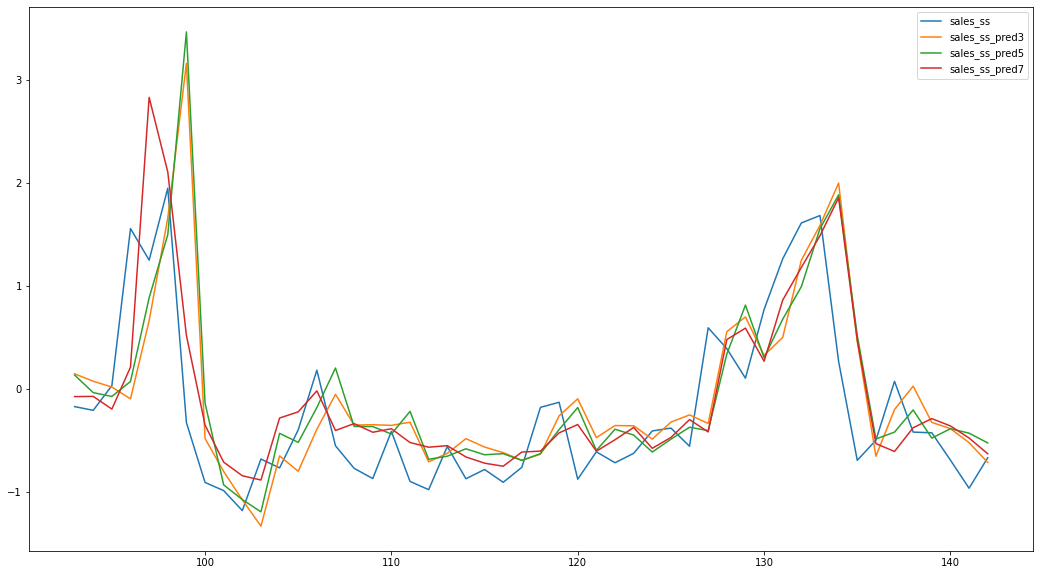

In [53]:
df_p1[['sales_ss',
       # 'sales_ss_pred1',
       # 'sales_ss_pred2',
       'sales_ss_pred3',
       # 'sales_ss_pred4',
       'sales_ss_pred5',
       # 'sales_ss_pred6',
       'sales_ss_pred7']][-50:].plot(
              figsize=(18,10))